In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

In [3]:
# ! pip install xgboost 

In [7]:
data = pd.read_csv('/home/stefan/stef/Disk/Projects/SkillTask2/data/train.csv/train.csv')

In [8]:
data.head()

,sample_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
0,sample_0,25.609375,6.703125,3.652344,10.039062,169.375,102.8125,1.422852,6.722656,8.015625,...,8.070312,4.363281,5.019531,5.710938,6.343750,6.843750,7.289062,7.617188,7.980469,1.0
1,sample_1,18.343750,5.824219,2.966797,4.902344,164.625,71.8125,1.357422,5.894531,2.753906,...,7.359375,4.195312,4.808594,5.425781,5.949219,6.339844,6.730469,7.074219,7.175781,1.0
2,sample_2,28.562500,6.230469,3.583984,7.882812,159.500,113.1875,1.696289,6.316406,4.605469,...,8.562500,4.523438,5.097656,5.789062,6.457031,6.871094,7.386719,7.878906,8.328125,1.0
3,sample_3,28.062500,6.132812,2.726562,6.378906,169.750,111.0000,1.535156,6.199219,3.712891,...,4.558594,3.533203,3.900391,4.261719,4.042969,3.869141,3.890625,4.042969,4.273438,1.0
4,sample_4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,...,6.613281,4.625000,4.996094,5.328125,5.593750,5.800781,6.027344,6.242188,6.449219,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Columns: 1614 entries, sample_id to y
dtypes: float64(1613), object(1)
memory usage: 13.5+ MB


In [13]:
data.nunique()

sample_id    1095
f0            743
f1            389
f2            540
f3            759
             ... 
f1608         555
f1609         595
f1610         593
f1611         607
y               2
Length: 1614, dtype: int64

In [7]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [8]:
data = data.fillna(0)

In [9]:
data.isna().values.any()

False

In [10]:
X = data.drop(['sample_id', 'y'], axis=1)
y = data['y']

In [12]:
# Data normalization
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
X_std = scale_features_std.fit_transform(X) 


In [15]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [33]:
param = {'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [34]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [35]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.82891	train-auc:0.96209
[1]	eval-auc:0.86301	train-auc:0.99913
[2]	eval-auc:0.85557	train-auc:0.99999
[3]	eval-auc:0.85401	train-auc:1.00000
[4]	eval-auc:0.86069	train-auc:1.00000
[5]	eval-auc:0.86523	train-auc:1.00000
[6]	eval-auc:0.86630	train-auc:1.00000
[7]	eval-auc:0.87369	train-auc:1.00000
[8]	eval-auc:0.87947	train-auc:1.00000
[9]	eval-auc:0.87636	train-auc:1.00000


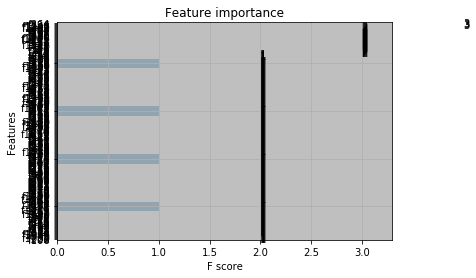

In [37]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
y_preds = clf.predict(x_test)

In [45]:
y_preds

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.])

In [46]:
AUC = metrics.roc_auc_score(y_test, y_preds)

In [47]:
AUC

0.7988695032935731

In [50]:
f1_score = metrics.f1_score(y_test, y_preds)
print("F1 score: %d" % f1_score)

F1 score: 0


In [52]:
 print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75        82
         1.0       0.82      0.93      0.87       137

    accuracy                           0.83       219
   macro avg       0.84      0.80      0.81       219
weighted avg       0.83      0.83      0.83       219



In [53]:
print(metrics.confusion_matrix(y_test, y_preds))

[[ 55  27]
 [ 10 127]]
